In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline


In [6]:
df = pd.read_csv("girlgenerationutf8-1.csv")

In [7]:
from datetime import datetime, timedelta

# 時間處理 12小時轉格式為24小時
dr = df["CREATE_DATE"]
for index in range(len(dr)):
    t = dr.loc[index].split(" ")
    if(t[1]=="p.m."):               
        time = t[0] + " " + t[2] #去掉am pm，依照 年月日 時分秒 合併      
        dtime = datetime.strptime(time, '%Y/%m/%d %H:%M:%S.') + timedelta(hours=12)  #如果為pm 新增12小時
        dr.loc[index] = dtime
        #print(dtime)       
    else:
        time = t[0] + " " + t[2]
        dr.loc[index] = datetime.strptime(time, '%Y/%m/%d %H:%M:%S.')


C:\Users\User\Anaconda2\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
# 修正df的CREATE_DATE欄位為轉換後的
df["CREATE_DATE"]=dr

# 備份修改後的資料
new_dataset = df

# 顯示
df.head()

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,PROGRAM_ID,PROGRAM_NAME,CREATE_DATE,PLAY_DATE,PLAY_TIME,...,SHIPPING_COUNTRY_ID1,SHIPPING_TOWN_ID1,RECEIPT_TITLE,SHIPPING_COUNTRY_ID2,SHIPPING_TOWN_ID2,SHIPPING_ZIP2,ORDER_NUM,TICKET_ENTRANCE_NO,SEX,ADDRESS
0,331,26237,52196,2,K12197,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010-10-14 23:25:58,2010/10/17,15:00,...,1,10,NaN,5,61,300.0,26237,0,male,2103
1,332,26237,52195,2,K12197,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010-10-14 23:25:58,2010/10/17,15:00,...,1,10,NaN,5,61,300.0,26237,0,male,2103
2,378,24923,46903,3,L22289,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010-09-18 23:26:37,2010/10/17,15:00,...,10,129,NaN,10,129,434.0,24923,0,male,2682
3,379,24923,46902,3,L22289,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010-09-18 23:26:37,2010/10/17,15:00,...,10,129,NaN,10,129,434.0,24923,0,male,2682
4,586,24930,46919,4,C12101,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010-09-18 23:28:56,2010/10/17,15:00,...,2,14,NaN,2,14,201.0,24930,0,male,718


In [9]:
# dt為需要的欄位

dt = df[["ORDER_ID","IDENTITY","T_STANDARD_TICKET_TYPE_NAME","SEAT_REGION_NAME","CREATE_DATE","SEX"]].sort_values("CREATE_DATE")
dt.head(10)

,ORDER_ID,IDENTITY,T_STANDARD_TICKET_TYPE_NAME,SEAT_REGION_NAME,CREATE_DATE,SEX
6430,21314,E12347,member,Floor2Sectionyellow2B,2010-09-18 13:18:55,male
6650,21315,C12086,member,FloorB1FloorSectionA,2010-09-18 13:22:33,male
6651,21315,C12086,member,FloorB1FloorSectionA,2010-09-18 13:22:33,male
6652,21315,C12086,member,FloorB1FloorSectionA,2010-09-18 13:22:33,male
6653,21315,C12086,member,FloorB1FloorSectionA,2010-09-18 13:22:33,male
952,21316,G22178,member,Floor3Sectionyellow3F,2010-09-18 13:23:48,female
953,21316,G22178,member,Floor3Sectionyellow3F,2010-09-18 13:23:48,female
954,21316,G22178,member,Floor3Sectionyellow3F,2010-09-18 13:23:48,female
2426,21317,S12312,member,FloorB1FloorSectionC,2010-09-18 13:29:46,male
2427,21317,S12312,member,FloorB1FloorSectionC,2010-09-18 13:29:46,male


In [10]:
# 觀看重複 IDENTITY，同個使用者不同時間有在訂票
dt["IDENTITY"].value_counts(dropna=False).head(10)

H12366    13
F22648    13
A22851    11
A12807    11
F12741    11
E12308    10
A22615    10
A22760    10
F22831     9
A12284     9
Name: IDENTITY, dtype: int64

In [11]:
# 觀看IDENTITY，總使用者有多少
dt["IDENTITY"].value_counts(dropna=False).count()

2724

In [12]:
dt.groupby([dt["IDENTITY"],df["T_STANDARD_TICKET_TYPE_NAME"]]).count()

,,ORDER_ID,T_STANDARD_TICKET_TYPE_NAME,SEAT_REGION_NAME,CREATE_DATE,SEX
IDENTITY,T_STANDARD_TICKET_TYPE_NAME,,,,,
112522,member,4,4,4,4,4
123475,member,2,2,2,2,2
130900,non-member,3,3,3,3,3
133062,member,2,2,2,2,2
213341,member,2,2,2,2,2
440306,member,1,1,1,1,1
443920,member,1,1,1,1,1
452039,member,2,2,2,2,2
475465,non-member,1,1,1,1,1


In [13]:
# 觀看重複 ORDER_ID 送出請求到資料表，一般來說使用者一次最多只能訂4張票
dt["ORDER_ID"].value_counts(dropna=False).head(10)

21490    4
23614    4
21510    4
21708    4
21506    4
21704    4
23228    4
23547    4
23543    4
23590    4
Name: ORDER_ID, dtype: int64

In [14]:
# 觀看重複 CREATE_DATE 同一個時間的請求數量
dt["CREATE_DATE"].value_counts(dropna=False).head(10)

2010-09-18 20:23:41    12
2010-09-18 19:17:42    11
2010-09-18 17:19:11    10
2010-09-18 19:17:41     9
2010-09-18 18:03:04     9
2010-09-18 17:32:05     8
2010-09-18 14:40:12     8
2010-09-18 18:20:41     8
2010-09-18 18:51:06     8
2010-09-18 16:39:07     8
Name: CREATE_DATE, dtype: int64

In [15]:
# 查詢 H12366 這個身分的訂票時間，可看出此用戶不同時間都有訂資料
dt.groupby("IDENTITY").get_group("H12366")

,ORDER_ID,IDENTITY,T_STANDARD_TICKET_TYPE_NAME,SEAT_REGION_NAME,CREATE_DATE,SEX
1478,21652,H12366,member,FloorB1FloorSectionC,2010-09-18 14:54:35,male
1477,21652,H12366,member,FloorB1FloorSectionC,2010-09-18 14:54:35,male
1476,21652,H12366,member,FloorB1FloorSectionC,2010-09-18 14:54:35,male
6171,21866,H12366,member,Floor2Sectionpurple2E,2010-09-18 15:55:32,male
6172,21866,H12366,member,Floor2Sectionpurple2E,2010-09-18 15:55:32,male
3455,21934,H12366,member,FloorB1FloorSectionA,2010-09-18 16:11:09,male
3456,21934,H12366,member,FloorB1FloorSectionA,2010-09-18 16:11:09,male
3454,21934,H12366,member,FloorB1FloorSectionA,2010-09-18 16:11:09,male
3457,21934,H12366,member,FloorB1FloorSectionA,2010-09-18 16:11:09,male
737,21947,H12366,member,Floor3Sectionyellow3C,2010-09-18 16:12:01,male


In [16]:
# 計算多少人同一個人不同時間買不同的票
dt.groupby([dt["IDENTITY"],df["ORDER_ID"]]).count()

ORDER_ID  T_STANDARD_TICKET_TYPE_NAME  SEAT_REGION_NAME  \
IDENTITY ORDER_ID                                                            
112522   24011            4                            4                 4   
123475   21375            2                            2                 2   
130900   26205            2                            2                 2   
         26206            1                            1                 1   
133062   23352            2                            2                 2   
213341   21994            2                            2                 2   
440306   24933            1                            1                 1   
443920   24429            1                            1                 1   
452039   24716            2                            2                 2   
475465   26228            1                            1                 1   
707478   25908            1                            1                 1   
807810   24864            2                            2                 2   
A11126   25986            1                            1                 1   
A12024   23483            2                            2                 2   
         25835            1                            1                 1   
A12031   24446            1                            1                 1   
A12053   25771            1                            1                 1   
A12073   25402            2                            2                 2   
A12077   24788            3                            3                 3   
A12097   24790            2                            2                 2   
A12106   23945            4                            4                 4   
A12107   22168            2                            2                 2   
A12109   21920            2                            2                 2   
A12116   23673            2                            2                 2   
A12120   22155            2                            2                 2   
A12121   24094            3                            3                 3   
A12132   22805            2                            2                 2   
A12168   24559            1                            1                 1   
A12181   25464            2                            2                 2   
A12183   23520            1                            1                 1   
...                     ...                          ...               ...   
V22121   24868            2                            2                 2   
V22140   23072            2                            2                 2   
W10033   24628            1                            1                 1   
W10038   24958            2                            2                 2   
W10040   21993            2                            2                 2   
         23412            2                            2                 2   
W20032   24149            3                            3                 3   
W20035   26203            1                            1                 1   
W20038   24903            2                            2                 2   
X12038   24682            2                            2                 2   
X12040   24805            2                            2                 2   
X12042   25557            2                            2                 2   
X12043   23061            2                            2                 2   
X12057   22141            2                            2                 2   
X22036   21851            2                            2                 2   
X22040   23283            2                            2                 2   
X22051   22560            2                            2                 2   
Y04213   22008            3                            3                 3   
Y09718   22022            3              

In [17]:
# 將資料集拆成 member & non-member
member_type=dt[dt["T_STANDARD_TICKET_TYPE_NAME"]=="member"]
nonmember_type=dt[dt["T_STANDARD_TICKET_TYPE_NAME"]=="non-member"]

# 去掉member & nonmember重複 IDENTITY 計算人數
member_type = member_type.drop_duplicates(subset=["IDENTITY"],keep='first')
nonmember_type = nonmember_type.drop_duplicates(subset=["IDENTITY"],keep='first')

# 計算出來會員購買人數 共2421人
member_type.groupby(member_type["IDENTITY"]).sum()

# 計算出來非會員購買人數 共438人
nonmember_type.groupby(nonmember_type["IDENTITY"]).sum().head()


,ORDER_ID
IDENTITY,
130900,26205
475465,26228
707478,25908
A11126,25986
A12024,25835


In [43]:
member_type.head()

,ORDER_ID,IDENTITY,T_STANDARD_TICKET_TYPE_NAME,SEAT_REGION_NAME,CREATE_DATE,SEX,newDate,newTime
6430,21314,E12347,member,Floor2Sectionyellow2B,2010-09-18 13:18:55,male,2010-09-18,13:18:55
6650,21315,C12086,member,FloorB1FloorSectionA,2010-09-18 13:22:33,male,2010-09-18,13:22:33
952,21316,G22178,member,Floor3Sectionyellow3F,2010-09-18 13:23:48,female,2010-09-18,13:23:48
2426,21317,S12312,member,FloorB1FloorSectionC,2010-09-18 13:29:46,male,2010-09-18,13:29:46
198,21318,L22363,member,FloorB1FloorSectionD,2010-09-18 13:29:55,male,2010-09-18,13:29:55


In [19]:
#最長時間與最短時間相減，在計算區間
# time  = (member_type["CREATE_DATE"].max() - member_type["CREATE_DATE"].min()).seconds
time1 = (nonmember_type["CREATE_DATE"].max() - nonmember_type["CREATE_DATE"].min()).seconds


In [20]:
# time / 60 /60
nonmember_type["CREATE_DATE"].max()

datetime.datetime(2010, 10, 14, 23, 59, 15)

In [21]:
nonmember_type["CREATE_DATE"].max() - nonmember_type["CREATE_DATE"].min()

datetime.timedelta(5, 39552)

In [22]:
time1 /60/60

10

In [23]:
# # 會員平均每小時的上線數量
# round(len(member_type)/(time/3600),2)

In [24]:
# # 非會員平均每小時的上線數量
# round(len(nonmember_type)/(time1/3600),2)

In [25]:
#member_type[member_type["CREATE_DATE"]<"2010-09-18 13:30:58"]
# 按照 "天" 分组 得知 9/18日有2393人購買 9/19日僅有28人購買
member_type.groupby(member_type["CREATE_DATE"].apply(lambda x:x.day)).count()

,ORDER_ID,IDENTITY,T_STANDARD_TICKET_TYPE_NAME,SEAT_REGION_NAME,CREATE_DATE,SEX
CREATE_DATE,,,,,,
18,2393,2393,2393,2393,2393,2393
19,28,28,28,28,28,28


In [26]:
member_type.head()

,ORDER_ID,IDENTITY,T_STANDARD_TICKET_TYPE_NAME,SEAT_REGION_NAME,CREATE_DATE,SEX
6430,21314,E12347,member,Floor2Sectionyellow2B,2010-09-18 13:18:55,male
6650,21315,C12086,member,FloorB1FloorSectionA,2010-09-18 13:22:33,male
952,21316,G22178,member,Floor3Sectionyellow3F,2010-09-18 13:23:48,female
2426,21317,S12312,member,FloorB1FloorSectionC,2010-09-18 13:29:46,male
198,21318,L22363,member,FloorB1FloorSectionD,2010-09-18 13:29:55,male


In [27]:
# 會員資料清理
# 按照 "小時"分组 
# 要區分開所以應該會有兩筆新資料集
# 拆成兩個欄位後，轉成datetim

member_type["newDate"] = [d.date() for d in member_type["CREATE_DATE"]]
member_type["newDate"] = pd.to_datetime(member_type["newDate"], format="%Y-%m-%d")

# 參考 https://stackoverflow.com/questions/45623799/why-do-i-get-1900-01-01-in-my-time-column-in-pandas
# 避免 pd.to_datetime 時分秒會有 1990-1-1增加在前面的問題
member_type["newTime"] = [d.time() for d in member_type["CREATE_DATE"]]
member_type["newTime"] = pd.to_datetime(member_type.newTime, format="%H:%M:%S").dt.time

member_type.head()

,ORDER_ID,IDENTITY,T_STANDARD_TICKET_TYPE_NAME,SEAT_REGION_NAME,CREATE_DATE,SEX,newDate,newTime
6430,21314,E12347,member,Floor2Sectionyellow2B,2010-09-18 13:18:55,male,2010-09-18,13:18:55
6650,21315,C12086,member,FloorB1FloorSectionA,2010-09-18 13:22:33,male,2010-09-18,13:22:33
952,21316,G22178,member,Floor3Sectionyellow3F,2010-09-18 13:23:48,female,2010-09-18,13:23:48
2426,21317,S12312,member,FloorB1FloorSectionC,2010-09-18 13:29:46,male,2010-09-18,13:29:46
198,21318,L22363,member,FloorB1FloorSectionD,2010-09-18 13:29:55,male,2010-09-18,13:29:55


In [28]:
# 重新整理資料集，減少欄位 => member
member = member_type[["IDENTITY","CREATE_DATE","newDate","newTime","SEX"]]
member.sort_values("CREATE_DATE")
member.head()

,IDENTITY,CREATE_DATE,newDate,newTime,SEX
6430,E12347,2010-09-18 13:18:55,2010-09-18,13:18:55,male
6650,C12086,2010-09-18 13:22:33,2010-09-18,13:22:33,male
952,G22178,2010-09-18 13:23:48,2010-09-18,13:23:48,female
2426,S12312,2010-09-18 13:29:46,2010-09-18,13:29:46,male
198,L22363,2010-09-18 13:29:55,2010-09-18,13:29:55,male


In [29]:
# 將member 拆成兩個時間 0918 & 0919
member0918 = member_type[member_type["newDate"]=="2010-09-18"]
member0919 = member_type[member_type["newDate"]=="2010-09-19"]

# 查看是否為0918資料
member0918.head(10)


,ORDER_ID,IDENTITY,T_STANDARD_TICKET_TYPE_NAME,SEAT_REGION_NAME,CREATE_DATE,SEX,newDate,newTime
6430,21314,E12347,member,Floor2Sectionyellow2B,2010-09-18 13:18:55,male,2010-09-18,13:18:55
6650,21315,C12086,member,FloorB1FloorSectionA,2010-09-18 13:22:33,male,2010-09-18,13:22:33
952,21316,G22178,member,Floor3Sectionyellow3F,2010-09-18 13:23:48,female,2010-09-18,13:23:48
2426,21317,S12312,member,FloorB1FloorSectionC,2010-09-18 13:29:46,male,2010-09-18,13:29:46
198,21318,L22363,member,FloorB1FloorSectionD,2010-09-18 13:29:55,male,2010-09-18,13:29:55
3889,21319,F12745,member,FloorB1FloorSectionD,2010-09-18 13:30:58,male,2010-09-18,13:30:58
2310,21320,F12705,member,Floor2Sectionyellow2C,2010-09-18 13:33:20,male,2010-09-18,13:33:20
2383,21322,A22921,member,Floor3Sectionyellow3F,2010-09-18 13:34:10,female,2010-09-18,13:34:10
3919,21323,F12376,member,Floor2Sectionyellow2C,2010-09-18 13:34:16,male,2010-09-18,13:34:16
310,21324,S22387,member,Floor2Sectionyellow2C,2010-09-18 13:34:56,female,2010-09-18,13:34:56


In [30]:
# 計算出 0918 每小時的人數
member0918_tmp = member0918.groupby(member0918["CREATE_DATE"].apply(lambda x:x.hour)).count()

# 格式化資料格式，並將index name修改為 hour
member0918_plot = pd.DataFrame(member0918_tmp["IDENTITY"])
member0918_plot.rename(columns={"IDENTITY":"0918_count"},inplace=True)
member0918_plot.index.name = "hour"
member0918_plot

,0918_count
hour,
13,62
14,252
15,161
16,327
17,480
18,431
19,206
20,126
21,75


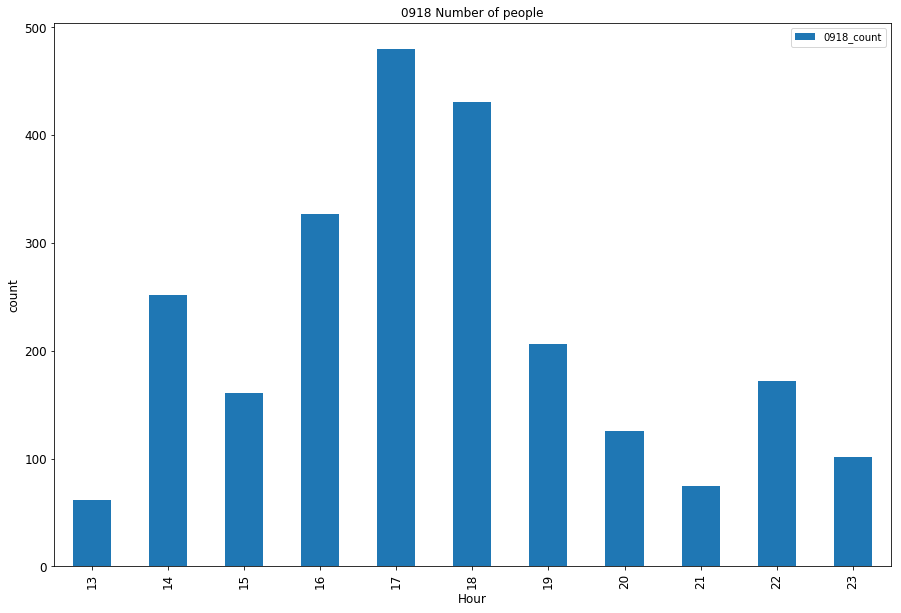

In [31]:
# 0918 圖表
fig0918, ax = plt.subplots()
ax = member0918_plot["0918_count"].plot(kind="bar", title ="0918 Number of people", figsize=(15,10), legend=True, fontsize=12,color="#1f77b4")
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("count", fontsize=12)
plt.show()

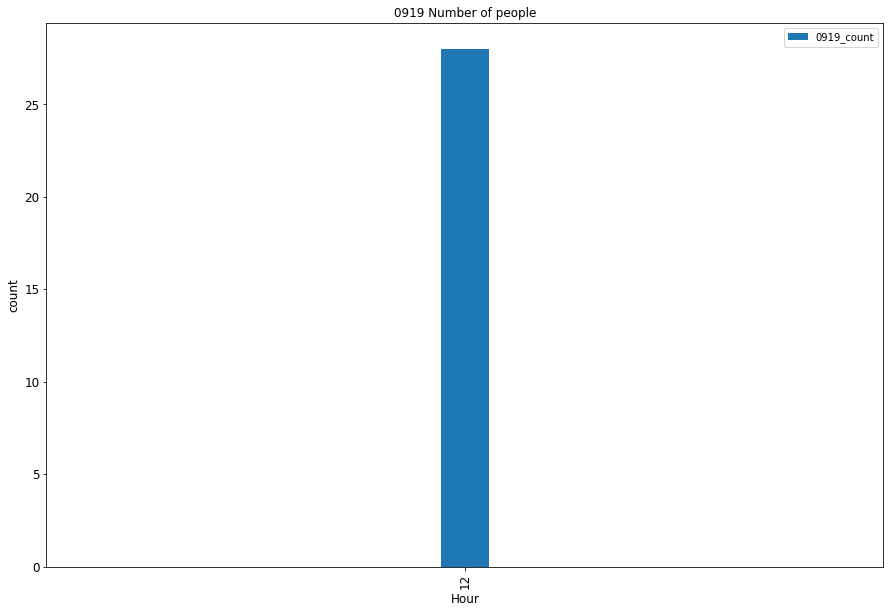

In [32]:
# 計算出 0919 每小時的人數
member0919_tmp = member0919.groupby(member0919["CREATE_DATE"].apply(lambda x:x.hour)).count()

# 格式化資料格式，並將index name修改為 hour
member0919_plot = pd.DataFrame(member0919_tmp["IDENTITY"])
member0919_plot.rename(columns={"IDENTITY":"0919_count"},inplace=True)
member0919_plot.index.name = "hour"

# 0918 圖表
fig0919, ax = plt.subplots()
ax = member0919_plot["0919_count"].plot(kind="bar", title ="0919 Number of people", figsize=(15,10), legend=True, fontsize=12,color="#1f77b4",width=0.03)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("count", fontsize=12)
plt.show()

In [33]:
# 非會員資料清理
# 按照 "小時"分组 
# 要區分開 9/18 9/19所以應該會有兩筆新資料集
# 拆成兩個欄位後，轉成datetime

nonmember_type["newDate"] = [d.date() for d in nonmember_type["CREATE_DATE"]]
nonmember_type["newDate"] = pd.to_datetime(nonmember_type["newDate"], format="%Y-%m-%d")

# 參考 https://stackoverflow.com/questions/45623799/why-do-i-get-1900-01-01-in-my-time-column-in-pandas
# 避免 pd.to_datetime 時分秒會有 1990-1-1增加在前面的問題
nonmember_type["newTime"] = [d.time() for d in nonmember_type["CREATE_DATE"]]
nonmember_type["newTime"] = pd.to_datetime(nonmember_type.newTime, format="%H:%M:%S").dt.time

nonmember_type.head()

,ORDER_ID,IDENTITY,T_STANDARD_TICKET_TYPE_NAME,SEAT_REGION_NAME,CREATE_DATE,SEX,newDate,newTime
6955,25467,N22385,non-member,Floor2Sectionyellow2B,2010-10-09 13:00:03,male,2010-10-09,13:00:03
5625,25468,E12404,non-member,Floor2Sectionpurple2B,2010-10-09 13:00:10,male,2010-10-09,13:00:10
4108,25469,F12705,non-member,Floor2Sectionyellow2B,2010-10-09 13:00:12,male,2010-10-09,13:00:12
6028,25470,J22254,non-member,Floor3Sectionyellow3C,2010-10-09 13:00:23,female,2010-10-09,13:00:23
469,25471,K22160,non-member,Floor2Sectionpurple2D,2010-10-09 13:00:28,female,2010-10-09,13:00:28


In [34]:
# 重新整理資料集，減少欄位 => member
nonmember = nonmember_type[["IDENTITY","CREATE_DATE","newDate","newTime","SEX"]]
nonmember.sort_values("CREATE_DATE")
nonmember.head()

,IDENTITY,CREATE_DATE,newDate,newTime,SEX
6955,N22385,2010-10-09 13:00:03,2010-10-09,13:00:03,male
5625,E12404,2010-10-09 13:00:10,2010-10-09,13:00:10,male
4108,F12705,2010-10-09 13:00:12,2010-10-09,13:00:12,male
6028,J22254,2010-10-09 13:00:23,2010-10-09,13:00:23,female
469,K22160,2010-10-09 13:00:28,2010-10-09,13:00:28,female


In [35]:
# 非會員
# 查看newDate的唯一值

tmp = nonmember_type.drop_duplicates(subset=["newDate"],keep='first')
tmp

,ORDER_ID,IDENTITY,T_STANDARD_TICKET_TYPE_NAME,SEAT_REGION_NAME,CREATE_DATE,SEX,newDate,newTime
6955,25467,N22385,non-member,Floor2Sectionyellow2B,2010-10-09 13:00:03,male,2010-10-09,13:00:03
1527,25377,H22331,non-member,Floor2Sectionyellow2B,2010-10-10 00:38:39,male,2010-10-10,00:38:39
4614,25835,A12024,non-member,FloorB1FloorSectionA,2010-10-11 00:14:09,male,2010-10-11,00:14:09
6875,25883,G22125,non-member,FloorB1FloorSectionD,2010-10-12 00:29:01,male,2010-10-12,00:29:01
5488,26046,F12209,non-member,Floor2Sectionred2B,2010-10-13 01:28:12,male,2010-10-13,01:28:12
3632,26068,R22368,non-member,Floor3Sectionyellow3B,2010-10-14 00:11:01,female,2010-10-14,00:11:01


In [36]:
# 將member 拆成每個時段
nonmember1009 = nonmember[nonmember_type["newDate"]=="2010-10-09"]
nonmember1010 = nonmember[nonmember_type["newDate"]=="2010-10-10"]
nonmember1011 = nonmember[nonmember_type["newDate"]=="2010-10-11"]
nonmember1012 = nonmember[nonmember_type["newDate"]=="2010-10-12"]
nonmember1013 = nonmember[nonmember_type["newDate"]=="2010-10-13"]
nonmember1014 = nonmember[nonmember_type["newDate"]=="2010-10-14"]
nonmember1009.head()

,IDENTITY,CREATE_DATE,newDate,newTime,SEX
6955,N22385,2010-10-09 13:00:03,2010-10-09,13:00:03,male
5625,E12404,2010-10-09 13:00:10,2010-10-09,13:00:10,male
4108,F12705,2010-10-09 13:00:12,2010-10-09,13:00:12,male
6028,J22254,2010-10-09 13:00:23,2010-10-09,13:00:23,female
469,K22160,2010-10-09 13:00:28,2010-10-09,13:00:28,female


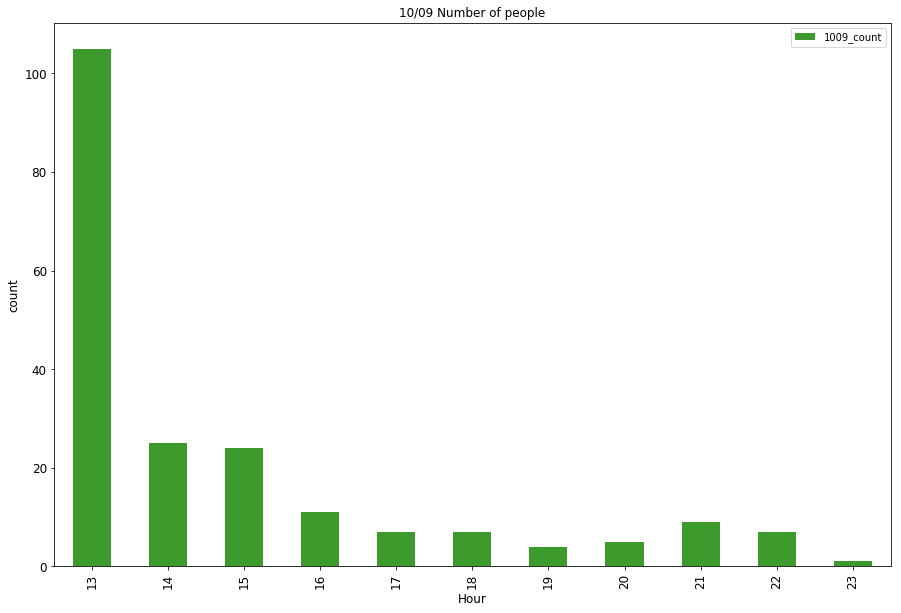

In [37]:
# 計算出 10/09 每小時的人數
nonmember1009_tmp = nonmember1009.groupby(nonmember1009["CREATE_DATE"].apply(lambda x:x.hour)).count()

# 格式化資料格式，並將index name修改為 hour
nonmember1009_plot = pd.DataFrame(nonmember1009_tmp["IDENTITY"])
nonmember1009_plot.rename(columns={"IDENTITY":"1009_count"},inplace=True)
nonmember1009_plot.index.name = "hour"

# 10/09 人數計算
fig1009, ax = plt.subplots()
ax = nonmember1009_plot["1009_count"].plot(kind="bar", title ="10/09 Number of people", figsize=(15,10), legend=True, fontsize=12,color="#3d9b2e")
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("count", fontsize=12)
plt.show()



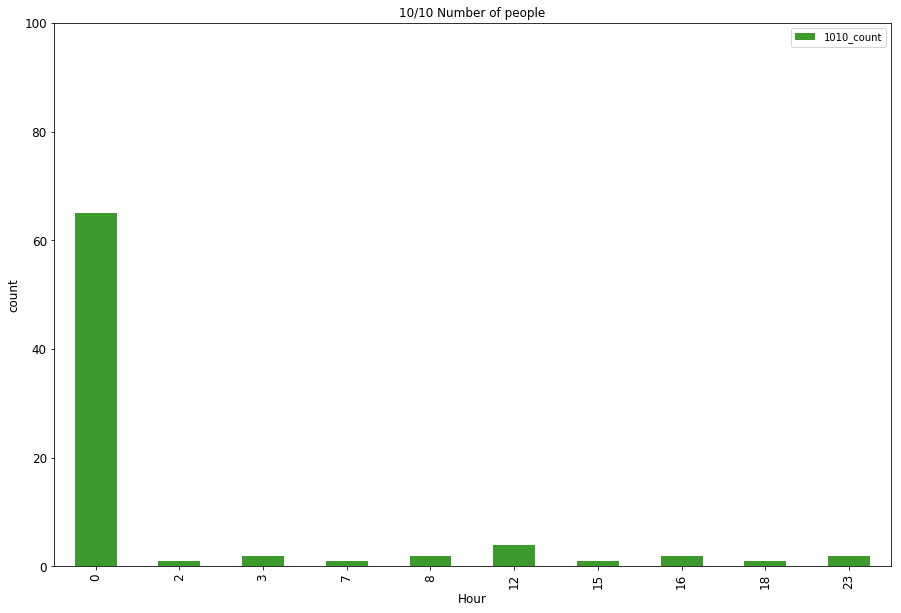

In [38]:
# 計算出 10/10 每小時的人數
nonmember1010_tmp = nonmember1010.groupby(nonmember1010["CREATE_DATE"].apply(lambda x:x.hour)).count()

# 格式化資料格式，並將index name修改為 hour
nonmember1010_plot = pd.DataFrame(nonmember1010_tmp["IDENTITY"])
nonmember1010_plot.rename(columns={"IDENTITY":"1010_count"},inplace=True)
nonmember1010_plot.index.name = "hour"

# 10/10 人數計算
fig1010, ax = plt.subplots()
ax = nonmember1010_plot["1010_count"].plot(kind="bar", title ="10/10 Number of people", figsize=(15,10), legend=True, fontsize=12,color="#3d9b2e")
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("count", fontsize=12)
ax.set_ylim([0,100])
plt.show()


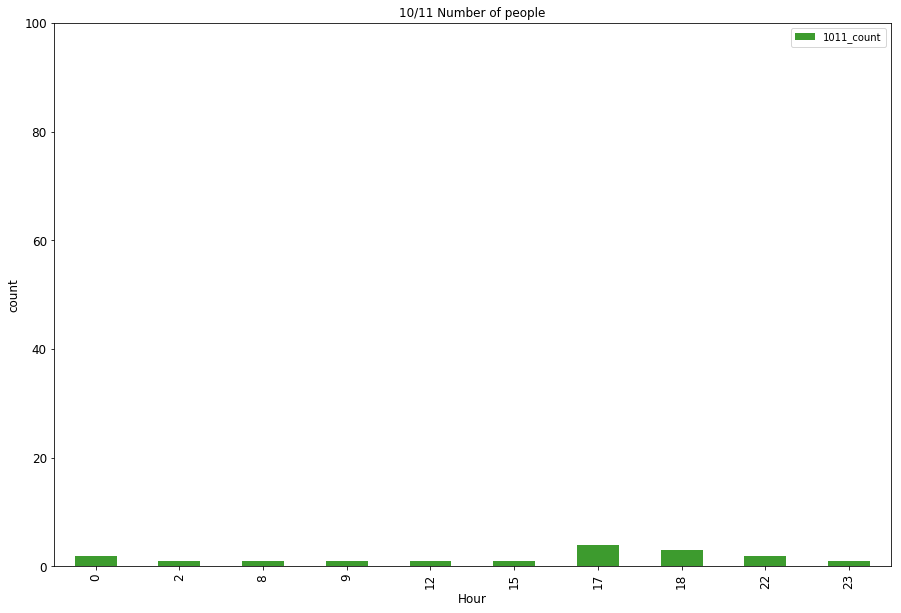

In [39]:
# 計算出 10/11 每小時的人數
nonmember1011_tmp = nonmember1011.groupby(nonmember1011["CREATE_DATE"].apply(lambda x:x.hour)).count()

# 格式化資料格式，並將index name修改為 hour
nonmember1011_plot = pd.DataFrame(nonmember1011_tmp["IDENTITY"])
nonmember1011_plot.rename(columns={"IDENTITY":"1011_count"},inplace=True)
nonmember1011_plot.index.name = "hour"

# 10/11 人數計算
fig1009, ax = plt.subplots()
ax = nonmember1011_plot["1011_count"].plot(kind="bar", title ="10/11 Number of people", figsize=(15,10), legend=True, fontsize=12,color="#3d9b2e")
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("count", fontsize=12)
ax.set_ylim([0,100])
plt.show()


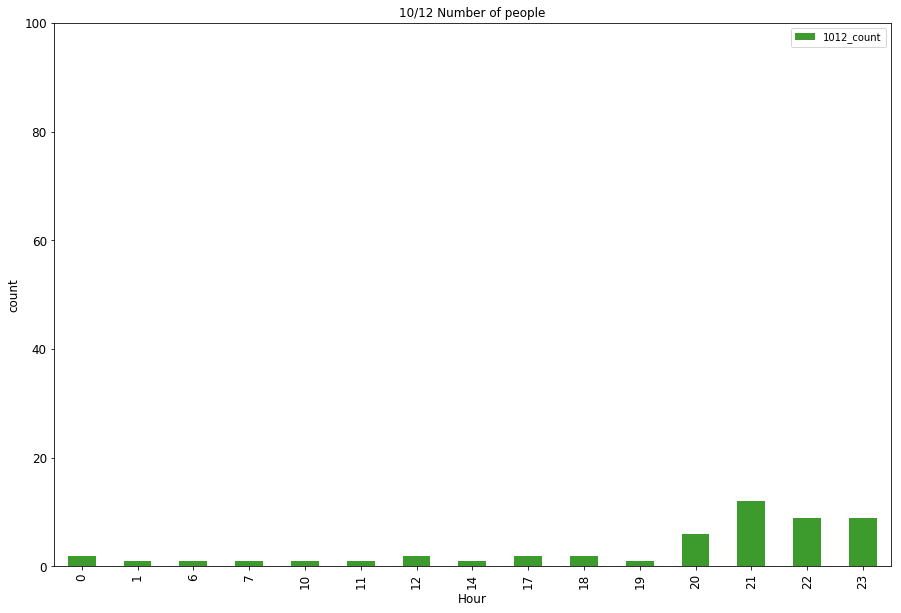

In [40]:
# 計算出 10/12 每小時的人數
nonmember1012_tmp = nonmember1012.groupby(nonmember1012["CREATE_DATE"].apply(lambda x:x.hour)).count()

# 格式化資料格式，並將index name修改為 hour
nonmember1012_plot = pd.DataFrame(nonmember1012_tmp["IDENTITY"])
nonmember1012_plot.rename(columns={"IDENTITY":"1012_count"},inplace=True)
nonmember1012_plot.index.name = "hour"

# 10/12 人數計算
fig1012, ax = plt.subplots()
ax = nonmember1012_plot["1012_count"].plot(kind="bar", title ="10/12 Number of people", figsize=(15,10), legend=True, fontsize=12,color="#3d9b2e")
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("count", fontsize=12)
ax.set_ylim([0,100])
plt.show()


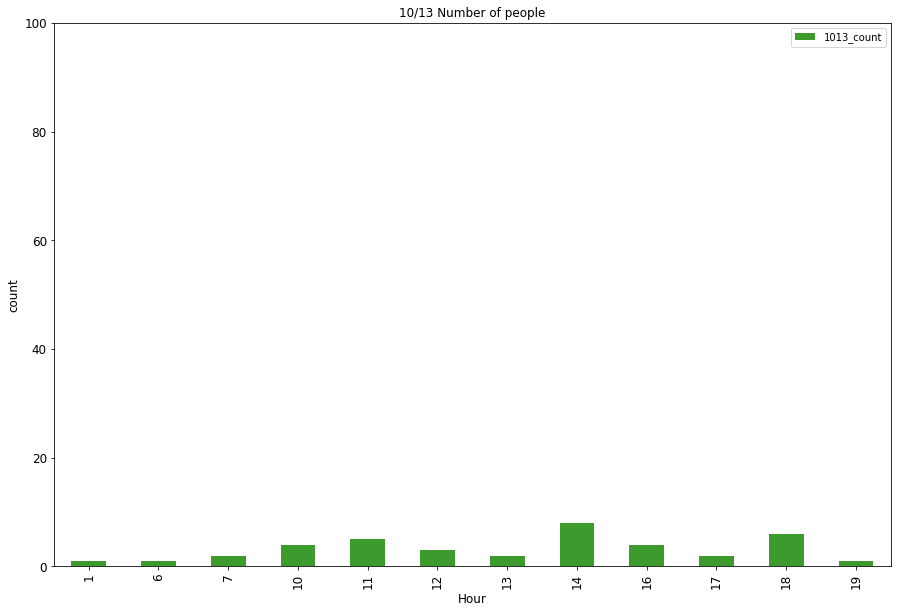

In [41]:
# 計算出 10/13 每小時的人數
nonmember1013_tmp = nonmember1013.groupby(nonmember1013["CREATE_DATE"].apply(lambda x:x.hour)).count()

# 格式化資料格式，並將index name修改為 hour
nonmember1013_plot = pd.DataFrame(nonmember1013_tmp["IDENTITY"])
nonmember1013_plot.rename(columns={"IDENTITY":"1013_count"},inplace=True)
nonmember1013_plot.index.name = "hour"

# 10/13 人數計算
fig1013, ax = plt.subplots()
ax = nonmember1013_plot["1013_count"].plot(kind="bar", title ="10/13 Number of people", figsize=(15,10), legend=True, fontsize=12,color="#3d9b2e")
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("count", fontsize=12)
ax.set_ylim([0,100])
plt.show()


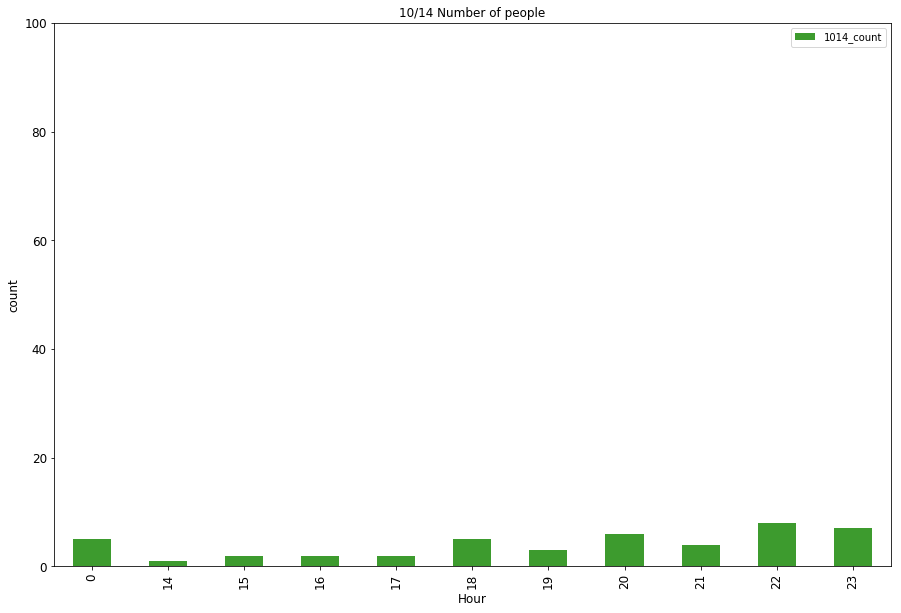

In [42]:
# 計算出 10/14 每小時的人數
nonmember1014_tmp = nonmember1014.groupby(nonmember1014["CREATE_DATE"].apply(lambda x:x.hour)).count()

# 格式化資料格式，並將index name修改為 hour
nonmember1014_plot = pd.DataFrame(nonmember1014_tmp["IDENTITY"])
nonmember1014_plot.rename(columns={"IDENTITY":"1014_count"},inplace=True)
nonmember1014_plot.index.name = "hour"

# 10/14 人數計算
fig1014, ax = plt.subplots()
ax = nonmember1014_plot["1014_count"].plot(kind="bar", title ="10/14 Number of people", figsize=(15,10), legend=True, fontsize=12,color="#3d9b2e")
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("count", fontsize=12)
ax.set_ylim([0,100])
plt.show()
